In [6]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('step_1_lesson_7.csv')

In [5]:
df

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


<AxesSubplot:xlabel='date', ylabel='visits'>

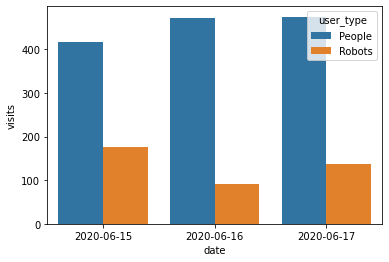

In [9]:
sns.barplot(x='date', y='visits', hue='user_type', data=df)

In [17]:
df_2 = pd.read_csv('step_3_lesson_7.csv')

In [18]:
df_2

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [19]:
visit_browser = df_2.groupby('browser', as_index=False).agg({'visits' : 'sum'})

In [20]:
visit_browser

,browser,visits
0,Android Browser,1.0
1,Chrome Mobile,31.0
2,Chromium,2.0
3,CocCoc,1.0
4,Edge,5.0
5,Firefox,58.0
6,Google Chrome,354.0
7,Mobile Safari,16.0
8,Opera,16.0
9,Safari,41.0


In [24]:
full_df = df_2.merge(visit_browser, on='browser', suffixes=('_type', '_all'))

In [26]:
full_df['ratio'] = full_df.visits_type / full_df.visits_all

In [27]:
full_df

,date,browser,user_type,visits_type,visits_all,ratio
0,2020-06-15,Google Chrome,People,250.0,354.0,0.706215
1,2020-06-15,Google Chrome,Robots,104.0,354.0,0.293785
2,2020-06-15,Yandex Browser,People,47.0,54.0,0.870370
3,2020-06-15,Yandex Browser,Robots,7.0,54.0,0.129630
4,2020-06-15,Firefox,Robots,31.0,58.0,0.534483
5,2020-06-15,Firefox,People,27.0,58.0,0.465517
6,2020-06-15,Chrome Mobile,People,31.0,31.0,1.000000
7,2020-06-15,Safari,Robots,22.0,41.0,0.536585
8,2020-06-15,Safari,People,19.0,41.0,0.463415
9,2020-06-15,Mobile Safari,People,15.0,16.0,0.937500


In [30]:
full_df.query('user_type == "Robots"')

,date,browser,user_type,visits_type,visits_all,ratio
1,2020-06-15,Google Chrome,Robots,104.0,354.0,0.293785
3,2020-06-15,Yandex Browser,Robots,7.0,54.0,0.129630
4,2020-06-15,Firefox,Robots,31.0,58.0,0.534483
7,2020-06-15,Safari,Robots,22.0,41.0,0.536585
10,2020-06-15,Mobile Safari,Robots,1.0,16.0,0.062500
12,2020-06-15,Opera,Robots,5.0,16.0,0.312500
14,2020-06-15,Samsung Internet,Robots,1.0,9.0,0.111111
15,2020-06-15,UCWEB,Robots,4.0,4.0,1.000000
17,2020-06-15,Edge,Robots,1.0,5.0,0.200000
20,2020-06-15,Chromium,Robots,1.0,2.0,0.500000


In [31]:
full_df.query('user_type == "Robots"').nsmallest(1, columns='ratio')

,date,browser,user_type,visits_type,visits_all,ratio
10,2020-06-15,Mobile Safari,Robots,1.0,16.0,0.0625


In [32]:
df_2.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [35]:
df_2['percent'] = round(df_2.visits / df_2.visits.sum() * 100, 2)

In [36]:
df_2

,date,browser,user_type,visits,percent
0,2020-06-15,Google Chrome,People,250.0,42.09
1,2020-06-15,Google Chrome,Robots,104.0,17.51
2,2020-06-15,Yandex Browser,People,47.0,7.91
3,2020-06-15,Firefox,Robots,31.0,5.22
4,2020-06-15,Chrome Mobile,People,31.0,5.22
5,2020-06-15,Firefox,People,27.0,4.55
6,2020-06-15,Safari,Robots,22.0,3.70
7,2020-06-15,Safari,People,19.0,3.20
8,2020-06-15,Mobile Safari,People,15.0,2.53
9,2020-06-15,Opera,People,11.0,1.85
